In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import datetime
import math
from math import sqrt
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation

* Get the stock data from Yahoo finance as a CSV for any company. 
* Drop all other columns (Volume, Year, Month and Day) and retain Open, High and Close - since I'm just predicting the close value for a day

In [31]:
def get_stock_data(normalized=0):
    url = "EDELWEISSNS.csv"
    col_names = ['Date','Open','High','Low','Close','Volume','Adj Close']
    stocks = pd.read_csv(url, header=0, names=col_names) 
    df = pd.DataFrame(stocks)
    date_split = df['Date'].str.split('-').str
    df['Year'], df['Month'], df['Day'] = date_split
    df["Volume"] = df["Volume"] / 10000
    return df

In [32]:
df = get_stock_data(0)
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close,Year,Month,Day
0,2008-10-03,41.299999,41.685001,39.400002,40.525002,0.002930,185090.0,2008,10,03
1,2008-10-06,39.700001,40.799999,37.200001,39.564999,0.002860,204340.0,2008,10,06
2,2008-10-07,40.000000,40.599998,36.000000,36.119999,0.002611,128970.0,2008,10,07
3,2008-10-08,35.000000,44.400002,34.500000,40.880001,0.002955,700490.0,2008,10,08
4,2008-10-10,40.400002,40.400002,35.299999,37.910000,0.002741,367380.0,2008,10,10


In [33]:
df.drop(df.columns[[0,3,6, 7,8,9]], axis=1, inplace=True)
df.head()

,Open,High,Close,Volume
0,41.299999,41.685001,40.525002,0.002930
1,39.700001,40.799999,39.564999,0.002860
2,40.000000,40.599998,36.119999,0.002611
3,35.000000,44.400002,40.880001,0.002955
4,40.400002,40.400002,37.910000,0.002741


<h2>Normalizing and removing the null data points</h2>

In [34]:
df['Open'] = df['Open']/100
df['High'] = df['High']/100
df['Volume'] = df['Volume']*100
df['Close'] = df['Close']/100
print(df)
nan_value_index = []
High = df.High.isnull()
for i in range(0, len(High)):
    if High[i] == 1:
        nan_value_index.append(i)
        df['High'][i] = 0
Open = df.Open.isnull()
for i in range(0, len(Open)):
    if Open[i] == 1:
        nan_value_index.append(i)
        df['Open'][i] = 0
Volume = df.Volume.isnull()
for i in range(0, len(Volume)):
    if Volume[i] == 1:
        nan_value_index.append(i)
        df['Volume'][i] = 0
Close = df.Close.isnull()
for i in range(0, len(Close)):
    if Close[i] == 1:
        nan_value_index.append(i)
        df['Close'][i] = 0

         Open     High    Close    Volume
0     0.41300  0.41685  0.40525  0.292964
1     0.39700  0.40800  0.39565  0.286023
2     0.40000  0.40600  0.36120  0.261119
3     0.35000  0.44400  0.40880  0.295530
4     0.40400  0.40400  0.37910  0.274059
5     0.37500  0.45000  0.38640  0.279337
6     0.40000  0.41400  0.40475  0.292602
7     0.39995  0.39995  0.39115  0.282770
8     0.35000  0.39290  0.38515  0.278433
9     0.39800  0.40000  0.38585  0.278939
10    0.36705  0.39000  0.38350  0.277240
11    0.38500  0.38865  0.38040  0.274999
12    0.35400  0.38100  0.36915  0.266866
13    0.35025  0.36800  0.35600  0.257360
14    0.35500  0.35500  0.29905  0.216189
15    0.29800  0.29800  0.27080  0.195767
16    0.27800  0.28400  0.26555  0.191972
17    0.26300  0.27900  0.26965  0.194936
18    0.27410  0.37000  0.34495  0.249371
19    0.32500  0.36385  0.35710  0.258155
20    0.36200  0.39900  0.36705  0.265348
21    0.34115  0.35995  0.34160  0.246950
22    0.33500  0.35500  0.34300  0

In [35]:
X = df[['High','Open', 'Volume']]
Y = df[['Close']]
factor = 0.80
length = X.shape[0]
total_for_train = int(length*factor)
X_train = X[:total_for_train]
Y_train = Y[:total_for_train]
X_test = X[total_for_train:]
Y_test = Y[total_for_train:]

In [36]:
print("X_train", X_train.shape)
print("y_train", Y_train.shape)
print("X_test", X_test.shape)
print("y_test", Y_test.shape)

X_train (1973, 3)
y_train (1973, 1)
X_test (494, 3)
y_test (494, 1)


<h2>Compiling and training the neural network model</h2>

In [37]:
classifier = Sequential()
classifier.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_dim = 3))
classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'linear'))
classifier.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = [])
classifier.fit(X_train, Y_train, batch_size = 128, epochs = 10, validation_split=0.05)

Train on 1874 samples, validate on 99 samples
Epoch 1/10
1874/1874 [==============================] - 0s 245us/step - loss: 0.1834 - val_loss: 0.8207
Epoch 2/10
1874/1874 [==============================] - 0s 19us/step - loss: 0.1685 - val_loss: 0.7783
Epoch 3/10
1874/1874 [==============================] - 0s 17us/step - loss: 0.1494 - val_loss: 0.7123
Epoch 4/10
1874/1874 [==============================] - 0s 16us/step - loss: 0.1231 - val_loss: 0.6084
Epoch 5/10
1874/1874 [==============================] - 0s 16us/step - loss: 0.0881 - val_loss: 0.4620
Epoch 6/10
1874/1874 [==============================] - 0s 17us/step - loss: 0.0493 - val_loss: 0.2918
Epoch 7/10
1874/1874 [==============================] - 0s 18us/step - loss: 0.0185 - val_loss: 0.1493
Epoch 8/10
1874/1874 [==============================] - 0s 16us/step - loss: 0.0071 - val_loss: 0.0816
Epoch 9/10
1874/1874 [==============================] - 0s 15us/step - loss: 0.0065 - val_loss: 0.0743
Epoch 10/10
1874/1874 [===

<h2>Predicted Values</h2>

In [38]:
predictions = classifier.predict(X_test)
print(predictions[:10])

[[0.7644563 ]
 [0.7619136 ]
 [0.757343  ]
 [0.7621344 ]
 [0.7571548 ]
 [0.7541392 ]
 [0.74588364]
 [0.747015  ]
 [0.7479137 ]
 [0.7710912 ]]


Execute the trained model

<h2>Calculating the error in the trained Neural Network model</h2>

In [39]:
trainScore = classifier.evaluate(X_train, Y_train, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = classifier.evaluate(X_test, Y_test, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.01 MSE (0.10 RMSE)
Test Score: 1.24 MSE (1.12 RMSE)


<h2>Predictions vs Real results</h2>

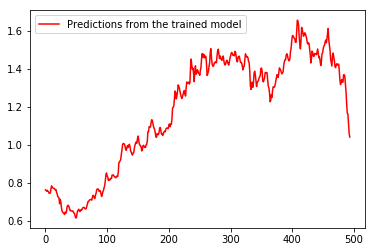

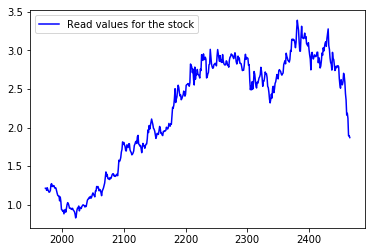

In [41]:
import matplotlib.pyplot as plt
plt.plot(predictions,color='red', label='Predictions from the trained model')
plt.legend(loc='upper left')
plt.show()
plt.plot(Y_test,color='blue', label='Read values for the stock')
plt.legend(loc='upper left')
plt.show()